# Modelo preemptivo para prever preços de ações

Estudo prático de Machine Learning - Criação de um modelo preemptivo para prever o preço de ações.

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#formatar valores para possuir apenas duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [6]:
#criar dataframe e carregar o dataset
cotacoes = yf.Ticker("PETR4.SA")

#definir período
dados = cotacoes.history(period="2y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-16 00:00:00-03:00,18.09,18.73,18.07,18.23,117782700,0.00,0.00
2023-05-17 00:00:00-03:00,18.43,18.55,17.68,17.78,107129200,0.00,0.00
2023-05-18 00:00:00-03:00,17.73,17.91,17.57,17.89,63010500,0.00,0.00
2023-05-19 00:00:00-03:00,18.07,18.14,17.77,17.86,69245500,0.00,0.00
2023-05-22 00:00:00-03:00,17.94,18.03,17.67,17.76,38010200,0.00,0.00


In [7]:
#retirar o indice do campo data
dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-05-16 00:00:00-03:00,18.09,18.73,18.07,18.23,117782700,0.00,0.00
1,2023-05-17 00:00:00-03:00,18.43,18.55,17.68,17.78,107129200,0.00,0.00
2,2023-05-18 00:00:00-03:00,17.73,17.91,17.57,17.89,63010500,0.00,0.00
3,2023-05-19 00:00:00-03:00,18.07,18.14,17.77,17.86,69245500,0.00,0.00
4,2023-05-22 00:00:00-03:00,17.94,18.03,17.67,17.76,38010200,0.00,0.00


In [9]:
dados.drop(dados.tail(1).index,inplace=True)
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
494,2025-05-09 00:00:00-03:00,31.10,31.18,30.64,30.91,25075600,0.00,0.00
495,2025-05-12 00:00:00-03:00,31.90,32.17,31.65,31.65,53493600,0.00,0.00
496,2025-05-13 00:00:00-03:00,31.77,32.25,31.35,32.13,56165300,0.00,0.00
497,2025-05-14 00:00:00-03:00,32.00,32.12,31.70,31.91,28060100,0.00,0.00
498,2025-05-15 00:00:00-03:00,31.70,32.09,31.59,31.87,32468300,0.00,0.00


In [10]:
#excluir as colunas que não serão utilizadas e renomear os campos
#axis = 1 é a coluna, 0 é a linha
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data','Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2023-05-16 00:00:00-03:00,18.09,18.73,18.07,18.23,117782700
1,2023-05-17 00:00:00-03:00,18.43,18.55,17.68,17.78,107129200
2,2023-05-18 00:00:00-03:00,17.73,17.91,17.57,17.89,63010500
3,2023-05-19 00:00:00-03:00,18.07,18.14,17.77,17.86,69245500
4,2023-05-22 00:00:00-03:00,17.94,18.03,17.67,17.76,38010200


In [15]:
#tipos de Dados
dados.dtypes

,0
Data,"datetime64[ns, America/Sao_Paulo]"
Abertura,float64
Maximo,float64
Minimo,float64
Fechamento,float64
Volume,int64


In [16]:
#volume de dados
dados.shape

(499, 6)

In [18]:
#estatísticas
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,499.00,499.00,499.00,499.00,499.00
mean,30.49,30.82,30.17,30.49,41974584.97
std,4.80,4.80,4.77,4.78,22924063.55
min,17.73,17.91,17.57,17.76,11526600.00
25%,27.52,27.84,27.22,27.52,27649900.00
50%,32.00,32.42,31.68,31.97,35601900.00
75%,33.90,34.11,33.62,33.86,49077100.00
max,37.61,37.74,37.40,37.58,230369800.00


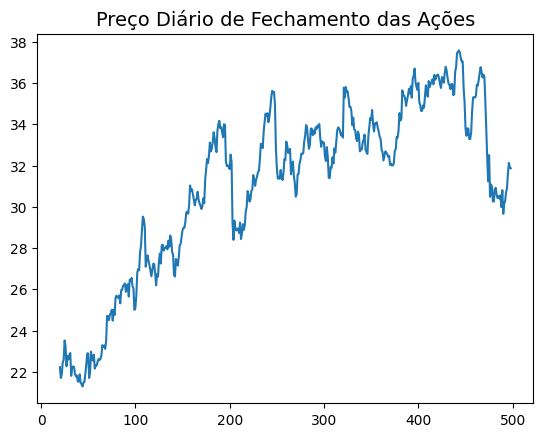

In [48]:
#plotagem
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [49]:
#criando campos novos para Média Movel com 5 Dias, 14 Dias e 21 Dias
dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [50]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
20,2023-06-14 00:00:00-03:00,21.37,22.23,21.32,22.23,98326000,NaN,NaN,NaN
21,2023-06-15 00:00:00-03:00,22.30,22.78,21.62,21.70,120579500,NaN,NaN,NaN
22,2023-06-16 00:00:00-03:00,21.58,22.09,21.44,21.89,94572000,NaN,NaN,NaN
23,2023-06-19 00:00:00-03:00,21.88,22.49,21.82,22.46,34573900,NaN,NaN,NaN
24,2023-06-20 00:00:00-03:00,22.37,22.71,22.08,22.57,55605300,22.17,NaN,NaN
25,2023-06-21 00:00:00-03:00,22.84,23.63,22.78,23.52,89294300,22.43,NaN,NaN
26,2023-06-22 00:00:00-03:00,23.23,23.40,22.95,23.22,43455800,22.73,NaN,NaN
27,2023-06-23 00:00:00-03:00,23.04,23.10,22.07,22.27,76023400,22.81,NaN,NaN
28,2023-06-26 00:00:00-03:00,22.24,22.93,22.24,22.77,53635000,22.87,NaN,NaN
29,2023-06-27 00:00:00-03:00,22.84,23.04,22.40,22.59,48399600,22.88,NaN,NaN


In [51]:
#excluir os NaN
dados.dropna(inplace=True)

In [52]:
#separar conjunto de dados para treino, teste e validação
qtd_linhas = len(dados)
qtd_linhas_treino = qtd_linhas - 200
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = 0:{qtd_linhas_teste}:{qtd_linhas}"

)

info

'linhas treino = 0:259 linhas teste = 0:259:439 linhas validacao = 0:439:459'

In [53]:
#separar variaveis PREDITORAS e variavel ALVO
preditoras = dados.drop(['Data', 'Fechamento','Volume'], axis=1)
target = dados['Fechamento']

preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
40,21.56,21.98,21.52,21.71,22.17,22.29
41,21.47,21.95,21.44,21.71,22.15,22.27
42,21.78,21.84,21.31,21.64,22.05,22.26
43,20.98,21.48,20.64,21.56,21.97,22.24
44,21.41,21.56,21.20,21.51,21.86,22.18


In [54]:
#normalização dos dados
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [55]:
#verificando a normalização
print('Preditoras: ', preditoras_normalizadas.shape)
print(preditoras_normalizadas)

Preditoras:  (459, 6)
[[0.03507098 0.03088435 0.05243453 0.01770103 0.03078444 0.0266207 ]
 [0.02929968 0.02861331 0.04802825 0.01751663 0.02891336 0.02549147]
 [0.04838893 0.02225479 0.04009695 0.01336793 0.02259408 0.02467459]
 ...
 [0.64883998 0.66245451 0.63920951 0.60615409 0.59662531 0.59798812]
 [0.66266791 0.65445826 0.66009523 0.62638062 0.60303193 0.60262481]
 [0.64463149 0.65261306 0.65353112 0.64086384 0.60991667 0.60516214]]


In [56]:
#separando dados para treino e teste
X_Train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

Y_Train = target[:qtd_linhas_treino]
Y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_Train), len(Y_Train))
print(len(X_test), len(Y_test))

259 259
180 180


In [89]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train )
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)

#quanto mais próximo de 1 melhor
f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:98.84'

In [92]:
#treinamento usando regressão linear (rede neural)
rn = MLPRegressor(max_iter = 2000)
rn.fit(X_Train, Y_Train )
predicao = rn.predict(X_test)
cd = rn.score(X_test,Y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:82.23'

In [93]:
#executando a previsão
previsao = preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]
data_pregao_full = dados['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregão':data_pregao, 'Real': res, 'Previsão':pred})

df.set_index('Data_Pregão', inplace = True)

df

,Real,Previsão
Data_Pregão,,
2025-04-15 00:00:00-03:00,30.26,30.37
2025-04-16 00:00:00-03:00,30.26,30.25
2025-04-17 00:00:00-03:00,30.85,30.83
2025-04-22 00:00:00-03:00,30.92,30.70
2025-04-23 00:00:00-03:00,30.57,30.91
2025-04-24 00:00:00-03:00,30.43,30.21
2025-04-25 00:00:00-03:00,30.52,30.57
2025-04-28 00:00:00-03:00,30.40,30.52
2025-04-29 00:00:00-03:00,30.56,30.60


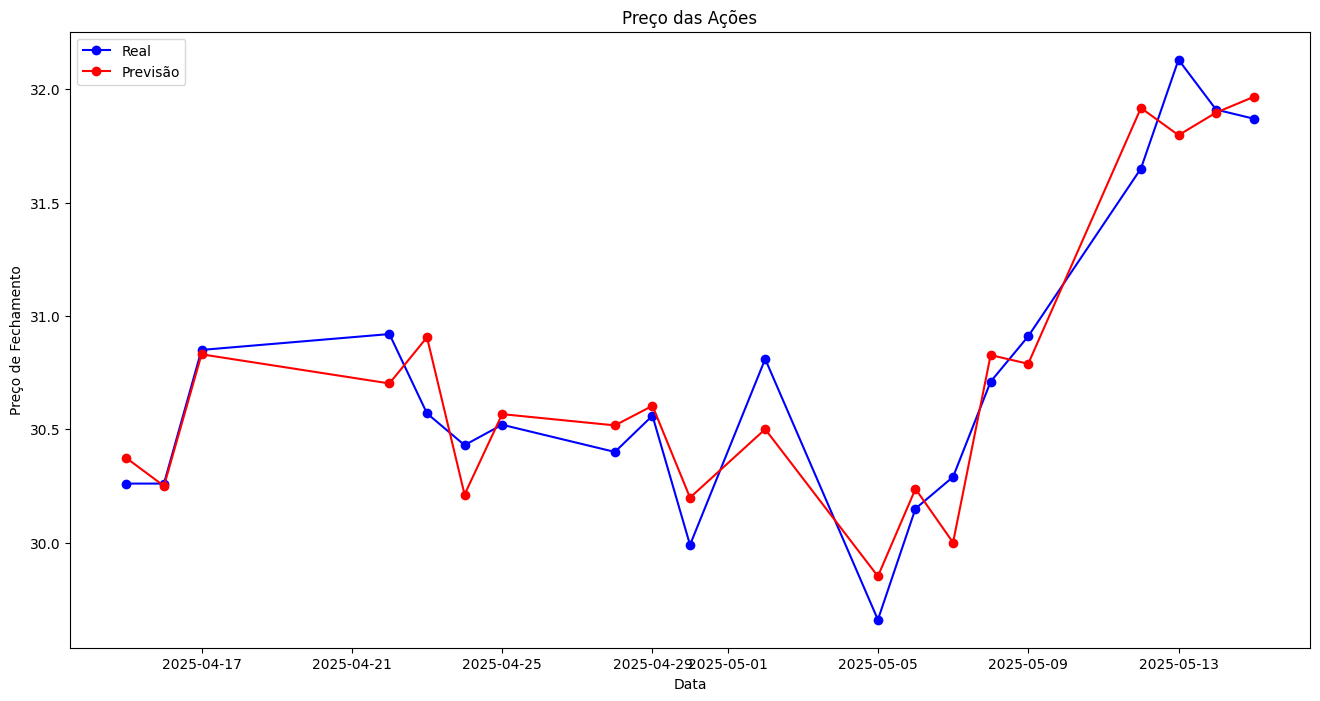

In [94]:
#gerando gráfico
plt.figure(figsize = (16,8))
plt.title('Preço das Ações')
plt.plot(df['Real'], label = 'Real', color = 'blue', marker = 'o')
plt.plot(df['Previsão'], label = 'Previsão', color = 'red', marker = 'o')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()